In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# ポアソン回帰モデル
$$
f\left( {y};{\mu} \right) = \frac { {\mu}^{y} e^{-\mu} }{ y ! } , \quad y = 0,1,2,\dots
$$
期待値、分散はそれぞれ$E\left( Y \right) = \mathrm {Var}\left( Y \right) = \mu$

## データセット

| No. | 教師データ(イベントの発生数) | 観測回数(特徴量) | 特徴量$1$ | 特徴量$2$ | $\dots$ | 特徴量$p$ |
|:----:|:----------------------------------:|:----------:|:-------:|:-----:|:------:|:-------:|
| 1 | $Y_{1}$ | $n_{1}$ | $x_{11}$ | $x_{12}$ | $\dots$ | $x_{1p}$ |
| 2 | $Y_{2}$ | $n_{2}$ | $x_{21}$ | $x_{22}$ | $\dots$ | $x_{2p}$ |
| $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\ddots$ | $\vdots$ |
| 2 | $Y_{N}$ | $n_{N}$ | $x_{N1}$ | $x_{N2}$ | $\dots$ | $x_{Np}$ |

## 連結関数

| 用語 | 数式 |
|:-----:|:-----:|
| $\boldsymbol {\mathrm {x}}_{i}$ | 第$i$共変量データ |
| $n_{i}$ | 第$i$の観察回数 |
| $Y_{i}$ | イベントの発生が観測された数 |

$Y_{1}, Y_{2}, \dots, Y_{N}$は互いに独立な確率へ数とし、$Y_{i}$の期待値は、
$$
E\left( Y_{i} \right) = \mu = n_{i} \theta_{i}
$$
で表されるものとする。

**モデルの例**
$$
\begin{eqnarray}
E\left( Y_{i} \right) = \mu & = & n_{i}\mathrm {exp}\left( \boldsymbol {\mathrm { x }}^{T} \boldsymbol {\beta} \right)\\
E\left( Y_{i} \right) = \mu & = & \mathrm {exp}\left( \boldsymbol {\mathrm { x }}^{T} \boldsymbol {\beta} \right)\\
E\left( Y_{i} \right) = \mu & = & \mathrm {exp}\left( - \boldsymbol {\mathrm { x }}^{T} \boldsymbol {\beta} \right)
\end{eqnarray}
$$

## 過分散

WIP

## 率比(RR; Rate Ratio)

**2値の説明変数**)<br>
> 2値の説明変数$x_{j}$を、ある要因が存在するか否やを表す**指示変数**としよう。すなわち、
> 
>  - 要因が存在しないときは$x_{j} = 0$
>  - 要因が存在するときは$x_{j} = 1$
> 
> という値をとるものとする。


要因あり対なしの**率比(rate ratio)**(ただし、他の説明変数の値は同じとする)
$$
RR = \frac {E\left( { Y_{i} }|{ x_{j} = 1 } \right)}{E\left( { Y_{i} }|{ x_{j} = 0 } \right)} = e^{\beta_{j}}
$$

**連続説明変数**)<br>
連続説明変数$x_{k}$の$\Delta$単位の増加に伴う率比
$$
RR = \frac {E\left( { Y_{i} }|{ x_{k} = m + \Delta } \right)}{E\left( { Y_{i} }|{ x_{k} = m } \right)} = e^{\beta_{k} \Delta}
$$

## 推定

### 区間推定
パラメータ$\beta_{j}$が近似的に
$$
\frac { b_{j} - \beta_{j} }{ \mathrm {s.e.}\left( b_{j} \right) } \sim N\left( 0, 1 \right)
$$
となることを利用して、区間推定を行える。

$$
\begin{eqnarray}
P\left\{ - z\left( \frac {\alpha}{2} \right) \le \frac {b_{j} - \beta_{j}}{ \mathrm {s.e.\left( b_{j} \right)} } \le z\left( \frac {\alpha}{2} \right) \right\} & = & 1 - \alpha\\
P\left\{ b_{j} - z\left( \frac {\alpha}{2} \right) \mathrm {s.e.}\left( b_{j} \right) \le \beta_{j} \le b_{j} + z\left( \frac {\alpha}{2} \right) \mathrm {s.e.}\left( b_{j} \right) \right\} & = & 1 - \alpha
\end{eqnarray}
$$

信頼係数0.95
$$
P\left\{ b_{j} - 1.96 \cdot \mathrm {s.e.}\left( b_{j} \right) \le \beta_{j} \le b_{j} + 1.96 \cdot \mathrm {s.e.}\left( b_{j} \right) \right\} = 0.95
$$

## 検定
### ワルド検定

#### $\beta_{2} = \cdots = \beta_{p} = 0$の帰無仮説

---

# 数値例)架空の植物100個体の種子数データ

In [102]:
# 架空の植物100個体の種子数データ
dataset_df = pd.read_csv("http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/poisson/data3a.csv")
dataset_df.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


> - $y$ : 種子数
> - $x$ : 個体の体サイズ
> - $f$ : 施肥処理の値

## 可視化

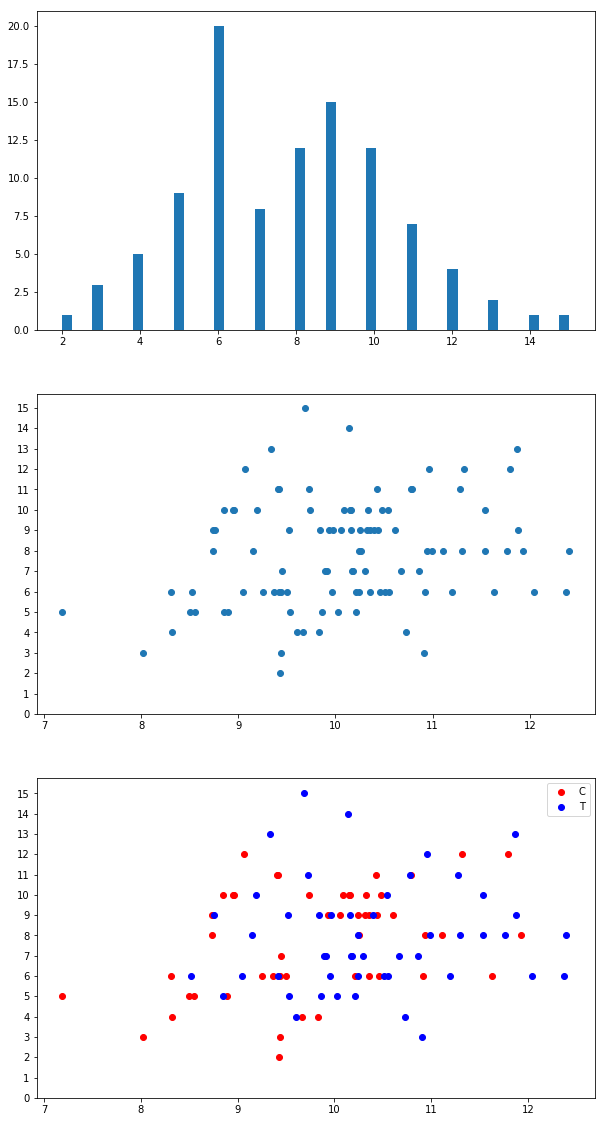

In [103]:
fig = plt.figure(figsize=(10, 20))

# ヒストグラム
ax1 = fig.add_subplot(3,1,1)
ax1.hist(dataset_df['y'], bins=50)

# 散布図
ax2 = fig.add_subplot(3,1,2)
ax2.scatter(x=dataset_df['x'], y=dataset_df['y'])
ax2.set_yticks(np.arange(0, 16, 1))

ax3 = fig.add_subplot(3,1,3)
ax3.scatter(
    x=dataset_df[dataset_df['f'] == 'C']['x'], 
    y=dataset_df[dataset_df['f'] == 'C']['y'], 
    color='red',
    label='C'
)
ax3.scatter(
    x=dataset_df[dataset_df['f'] == 'T']['x'], 
    y=dataset_df[dataset_df['f'] == 'T']['y'], 
    color='blue',
    label='T'
)
ax3.set_yticks(np.arange(0, 16, 1))

plt.legend()
plt.show()

In [104]:
print('平均値 = %0.3f' % dataset_df['y'].mean())
print('分散    = %0.3f' % dataset_df['y'].var())

平均値 = 7.830
分散    = 6.890


平均値と分散の値からポアソン分布の仮定$E\left( Y \right) = Var\left( Y \right) = \mu$を満たしていることがわかる。そのため、ポアソン分布によるモデリングを行う。

## モデリング
 - [statsmodels.genmod.generalized_linear_model.GLM](https://www.statsmodels.org/dev/generated/statsmodels.genmod.generalized_linear_model.GLM.html)
 - [statsmodels.genmod.generalized_linear_model.GLM.fit](https://www.statsmodels.org/dev/generated/statsmodels.genmod.generalized_linear_model.GLM.fit.html#statsmodels.genmod.generalized_linear_model.GLM.fit)

### モデル1)$E\left( Y_{i} \right) = \mu_{i} = \mathrm {exp}\left( \beta_{0} + \beta_{1}x_{i} \right)$

In [105]:
import statsmodels.api as sm


y_ser = dataset_df['y']
feature_df = sm.add_constant(dataset_df['x'])  # 変数xに定数項を追加したデータフレームを作成.

# 分布はポアソン分布、リンク関数は対数リンク関数の一般化線形モデルを作成
model = sm.GLM(
    y_ser, 
    feature_df, 
    family=sm.families.Poisson()  # ポアソン分布の場合はデフォルトで対数リンク関数が指定される
)
result = model.fit()

In [106]:
# 結果
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Sun, 06 Jan 2019   Deviance:                       84.993
Time:                        17:51:32   Pearson chi2:                     83.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [107]:
# 別の関数でモデリングすることも可能です。
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.genmod.families.links import log


model1 = smf.glm(
    formula='y ~ x',    # モデル式
    data=dataset_df, # データフレームの指定
    family=sm.families.Poisson(link=log)  # 確率分布の指定. (省略化 : リンク関数の指定.)
)
result1 = model1.fit()
# 結果
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Sun, 06 Jan 2019   Deviance:                       84.993
Time:                        17:51:34   Pearson chi2:                     83.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [108]:
# 結果2
result1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            474.7725 
Link Function:      log              BIC:            -366.3137
Dependent Variable: y                Log-Likelihood: -235.39  
Date:               2019-01-06 17:51 LL-Null:        -237.64  
No. Observations:   100              Deviance:       84.993   
Df Model:           1                Pearson chi2:   83.8     
Df Residuals:       98               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept      1.2917    0.3637  3.5517  0.0004  0.5789  2.0045
x              0.0757    0.0356  2.1251  0.0336  0.0059  0.1454
==============================================================

"""

`z`は$\beta = 0$とおいたときのWald統計量(Wald statistics)です。
$$
z = \frac { \mathrm {coef} }{ \mathrm {s.e.}\left( \mathrm {coef} \right) }\\
z \sim N\left( 0, 1 \right)
$$

In [109]:
result1.params / result1.bse

Intercept    3.551742
x            2.125084
dtype: float64

### モデル2)$E\left( Y_{i} \right) = \mu_{i} = \mathrm {exp}\left( \beta_{0} + \beta_{1}x_{i} + \beta_{2} f_{i} \right)$

In [110]:
dataset_df.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [111]:
dataset_df['f'].replace({'C': 0, 'T': 1}, inplace=True)

In [112]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.genmod.families.links import log


model2 = smf.glm(
    formula='y ~ x + f',    # モデル式
    data=dataset_df, # データフレームの指定
    family=sm.families.Poisson(link=log)  # 確率分布の指定. (省略化 : リンク関数の指定.)
)
result2 = model2.fit()
# 結果
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Sun, 06 Jan 2019   Deviance:                       84.808
Time:                        17:51:43   Pearson chi2:                     83.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
x              0.0801      0.037      2.162      0.031       0.007       0.153
f             -0.0320      0.074     -0.430      0.667      -0.178       0.114
==============================================================================
"""

## モデル選択

 - 逸脱度
 - AIC

### 逸脱度(対数尤度比統計量)
$$
D = 2 \left[ \log {L\left( \boldsymbol {\mathrm {b_{max}}} \right)} - \log {L\left( \boldsymbol {\mathrm {b}} \right)} \right]
$$

In [148]:
# 飽和モデル(フルモデル)
import statsmodels.api as sm
import statsmodels.formula.api as smf


# この場合のフルモデルとは、
# データ数が100個なのでパラメータ100個を使って
# 当てはめたモデルになる.
full_model = smf.glm(
    formula='y ~ y',
    data=dataset_df,
    family=sm.families.Poisson()
)
result_of_full_model = full_model.fit()
# 結果
result_of_full_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            393.9380 
Link Function:      log              BIC:            -447.1482
Dependent Variable: y                Log-Likelihood: -194.97  
Date:               2019-01-07 20:03 LL-Null:        -237.64  
No. Observations:   100              Deviance:       4.1585   
Df Model:           1                Pearson chi2:   3.88     
Df Residuals:       98               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept      1.0328    0.1215  8.5037  0.0000  0.7948  1.2709
y              0.1241    0.0133  9.3004  0.0000  0.0979  0.1502
==============================================================

"""

In [149]:
# 飽和モデルの対数尤度
full_loglike = full_model.loglike(result_of_full_model.params)
full_loglike

-194.96897933244512

In [151]:
# Nullモデル
null_model = smf.glm(
    formula='y ~ 1',
    data=dataset_df,
    family=sm.families.Poisson()
)
result_of_null_model = null_model.fit()
# 結果
result_of_null_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            477.2864 
Link Function:      log              BIC:            -366.4049
Dependent Variable: y                Log-Likelihood: -237.64  
Date:               2019-01-07 20:03 LL-Null:        -237.64  
No. Observations:   100              Deviance:       89.507   
Df Model:           0                Pearson chi2:   87.1     
Df Residuals:       99               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept     2.0580    0.0357  57.5862  0.0000  1.9879  2.1280
==============================================================

"""

In [152]:
null_loglike = null_model.loglike(result_of_null_model.params)
null_loglike

-237.6432213092867

---
# 参考文献

**書籍**

 - 久保拓弥[2016] 『データ解析のための統計モデリング入門 - 一般化線形モデル・階層ベイズモデル・MCMC』 株式会社岩波書店

**Webサイト**

 - [Generalized Linear Models — statsmodels v0.10.0.dev0+905.ge1fa49185 documentation](https://www.statsmodels.org/dev/glm.html)
 - [「An introduction to generalized linear models third edition」の解答](https://www.crcpress.com/downloads/C9500/C9500_Solutions.pdf)
 - [一般化線形 (混合) モデル (1) - 確率分布，最尤推定，ポアソン回帰](http://hosho.ees.hokudai.ac.jp/~kubo/stat/2013/ou1/kubostat2013ou1.pdf)
 - [ディスプレイ広告のクリック数改善のためのデザイン最適化に、ポアソン分布 / 負の二項分布によるGLMを使ってみる - 六本木で働くデータサイエンティストのブログ](https://tjo.hatenablog.com/entry/2013/09/10/234318)
 - [「使い分け」ではなく「妥当かどうか」が大事：重回帰分析＆一般化線形モデル選択まわりの再まとめ - 六本木で働くデータサイエンティストのブログ](https://tjo.hatenablog.com/entry/2013/09/23/232814)